# Mobile Price Project Using Classification Algorithms ( Decission Trees, Random Forest, SVM )

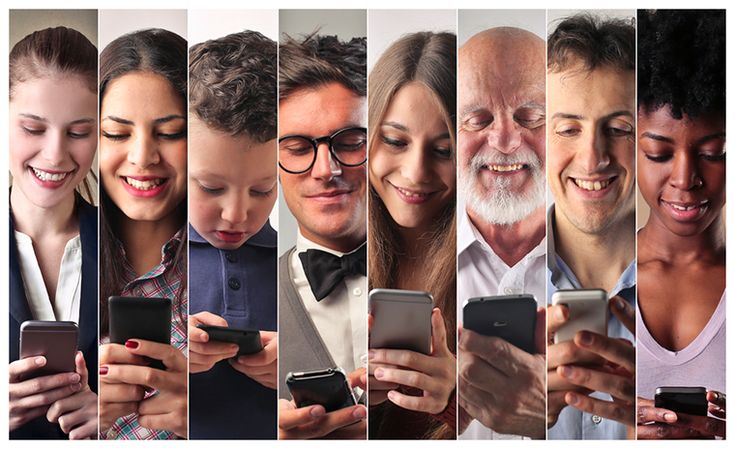

# Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


plt.style.use('ggplot')


In [5]:
# show all columns
pd.set_option('display.max_columns', 50)


# Import Datasets

In [6]:
train_data = pd.read_csv('phone_train.csv')
test_data = pd.read_csv('phone_test.csv')

In [7]:
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

In [8]:
df_train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
1       0.7        136        3   6        905      1988  2631    17     3   
2       0.9        145        5   6       1263      1716  2603    11     2   
3       0.8        131        6   9       1216      1786  2769    16     8   
4       0.6        141        2  14       1208      1212  1411     8     2   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [9]:
df_test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  16        226      1412  3476    12     7   
1      0.8        191        5  12        746       857  3895     6     0   
2      0.9        186        3   4       1270      1366  2396    17    10   
3      0.5         96        8  20        295      1752  3893    10     0   
4      0.5        108        6  18        749       810  1773    15     8   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
995    0.5        170        7  17        644       913  2121    14     8   
996    0.9        186        4   2       1152      1632  1933     8     1   
997    0.5         80        1  12        477       825  1223     5     0   
998    0.4        171        2  12         38       832  2509    15    11   
999    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

# Preprocesing

<div class="alert alert-block alert-info"> Checking the similarity of the test data with the train data </div> 

In [10]:
df_train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

In [11]:
df_test.describe()

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean      4.593000     0.487000    33.652000     0.517500   139.51100   
std       4.463325     0.500081    18.128694     0.280861    34.85155   
min       0.000000     0.000000     2.000000     0.100000    80.00000   
25%       1.000000     0.000000    18.000000     0.300000   109.75000   
50%       3.000000     0.000000    34.500000     0.500000   139.00000   
75%       7.000000     1.000000    49.000000     0.800000   170.00000   
max      19.000000     1.000000    64.000000     1.000000   200.00000   

           n_cores           pc    px_height     px_width          ram  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      4.328000    10.054000   627.121000  1239.774000  2138.998000   
std       2.288155     6.095099   432.929699   439.670981  1088.092278   
min       1.000000     0.000000     0.000000   501.000000   263.000000   
25%       2.000000     5.000000   263.750000   831.750000  1237.250000   
50%       4.000000    10.000000   564.500000  1250.000000  2153.500000   
75%       6.000000    16.000000   903.000000  1637.750000  3065.500000   
max       8.000000    20.000000  1907.000000  1998.000000  3989.000000   

              sc_h         sc_w    talk_time      three_g  touch_screen  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.00000   
mean     11.995000     5.316000    11.085000     0.756000       0.50000   
std       4.320607     4.240062     5.497636     0.429708       0.50025   
min       5.000000     0.000000     2.000000     0.000000       0.00000   
25%       8.000000     2.000000     6.750000     1.000000       0.00000   
50%      12.000000     5.000000    11.000000     1.000000       0.50000   
75%      16.000000     8.000000    16.000000     1.000000       1.00000   
max      19.000000    18.000000    20.000000     1.000000       1.00000   

              wifi  
count  1000.000000  
mean      0.507000  
std       0.500201  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

<div class="alert alert-block alert-info"> They're similar </div> 

<div class="alert alert-block alert-info"> Missing values of train dataset </div> 

In [12]:
m = df_train.isnull().sum()
if m.all() == 0:
    print('Missing values *train dataset*  =>>> False')
else:
    print('We have missing values in train dataset:\n', m)

Missing values *train dataset*  =>>> False


<div class="alert alert-block alert-info"> Missing values of test dataset </div> 

In [13]:
m = df_test.isnull().sum()
if m.all() == 0:
    print('Missing values *test dataset* =>>> False')
else:
    print('We have missing values in test dataset:\n', m)

Missing values *test dataset* =>>> False


<div class="alert alert-block alert-info"> Visualization of train dataset </div> 

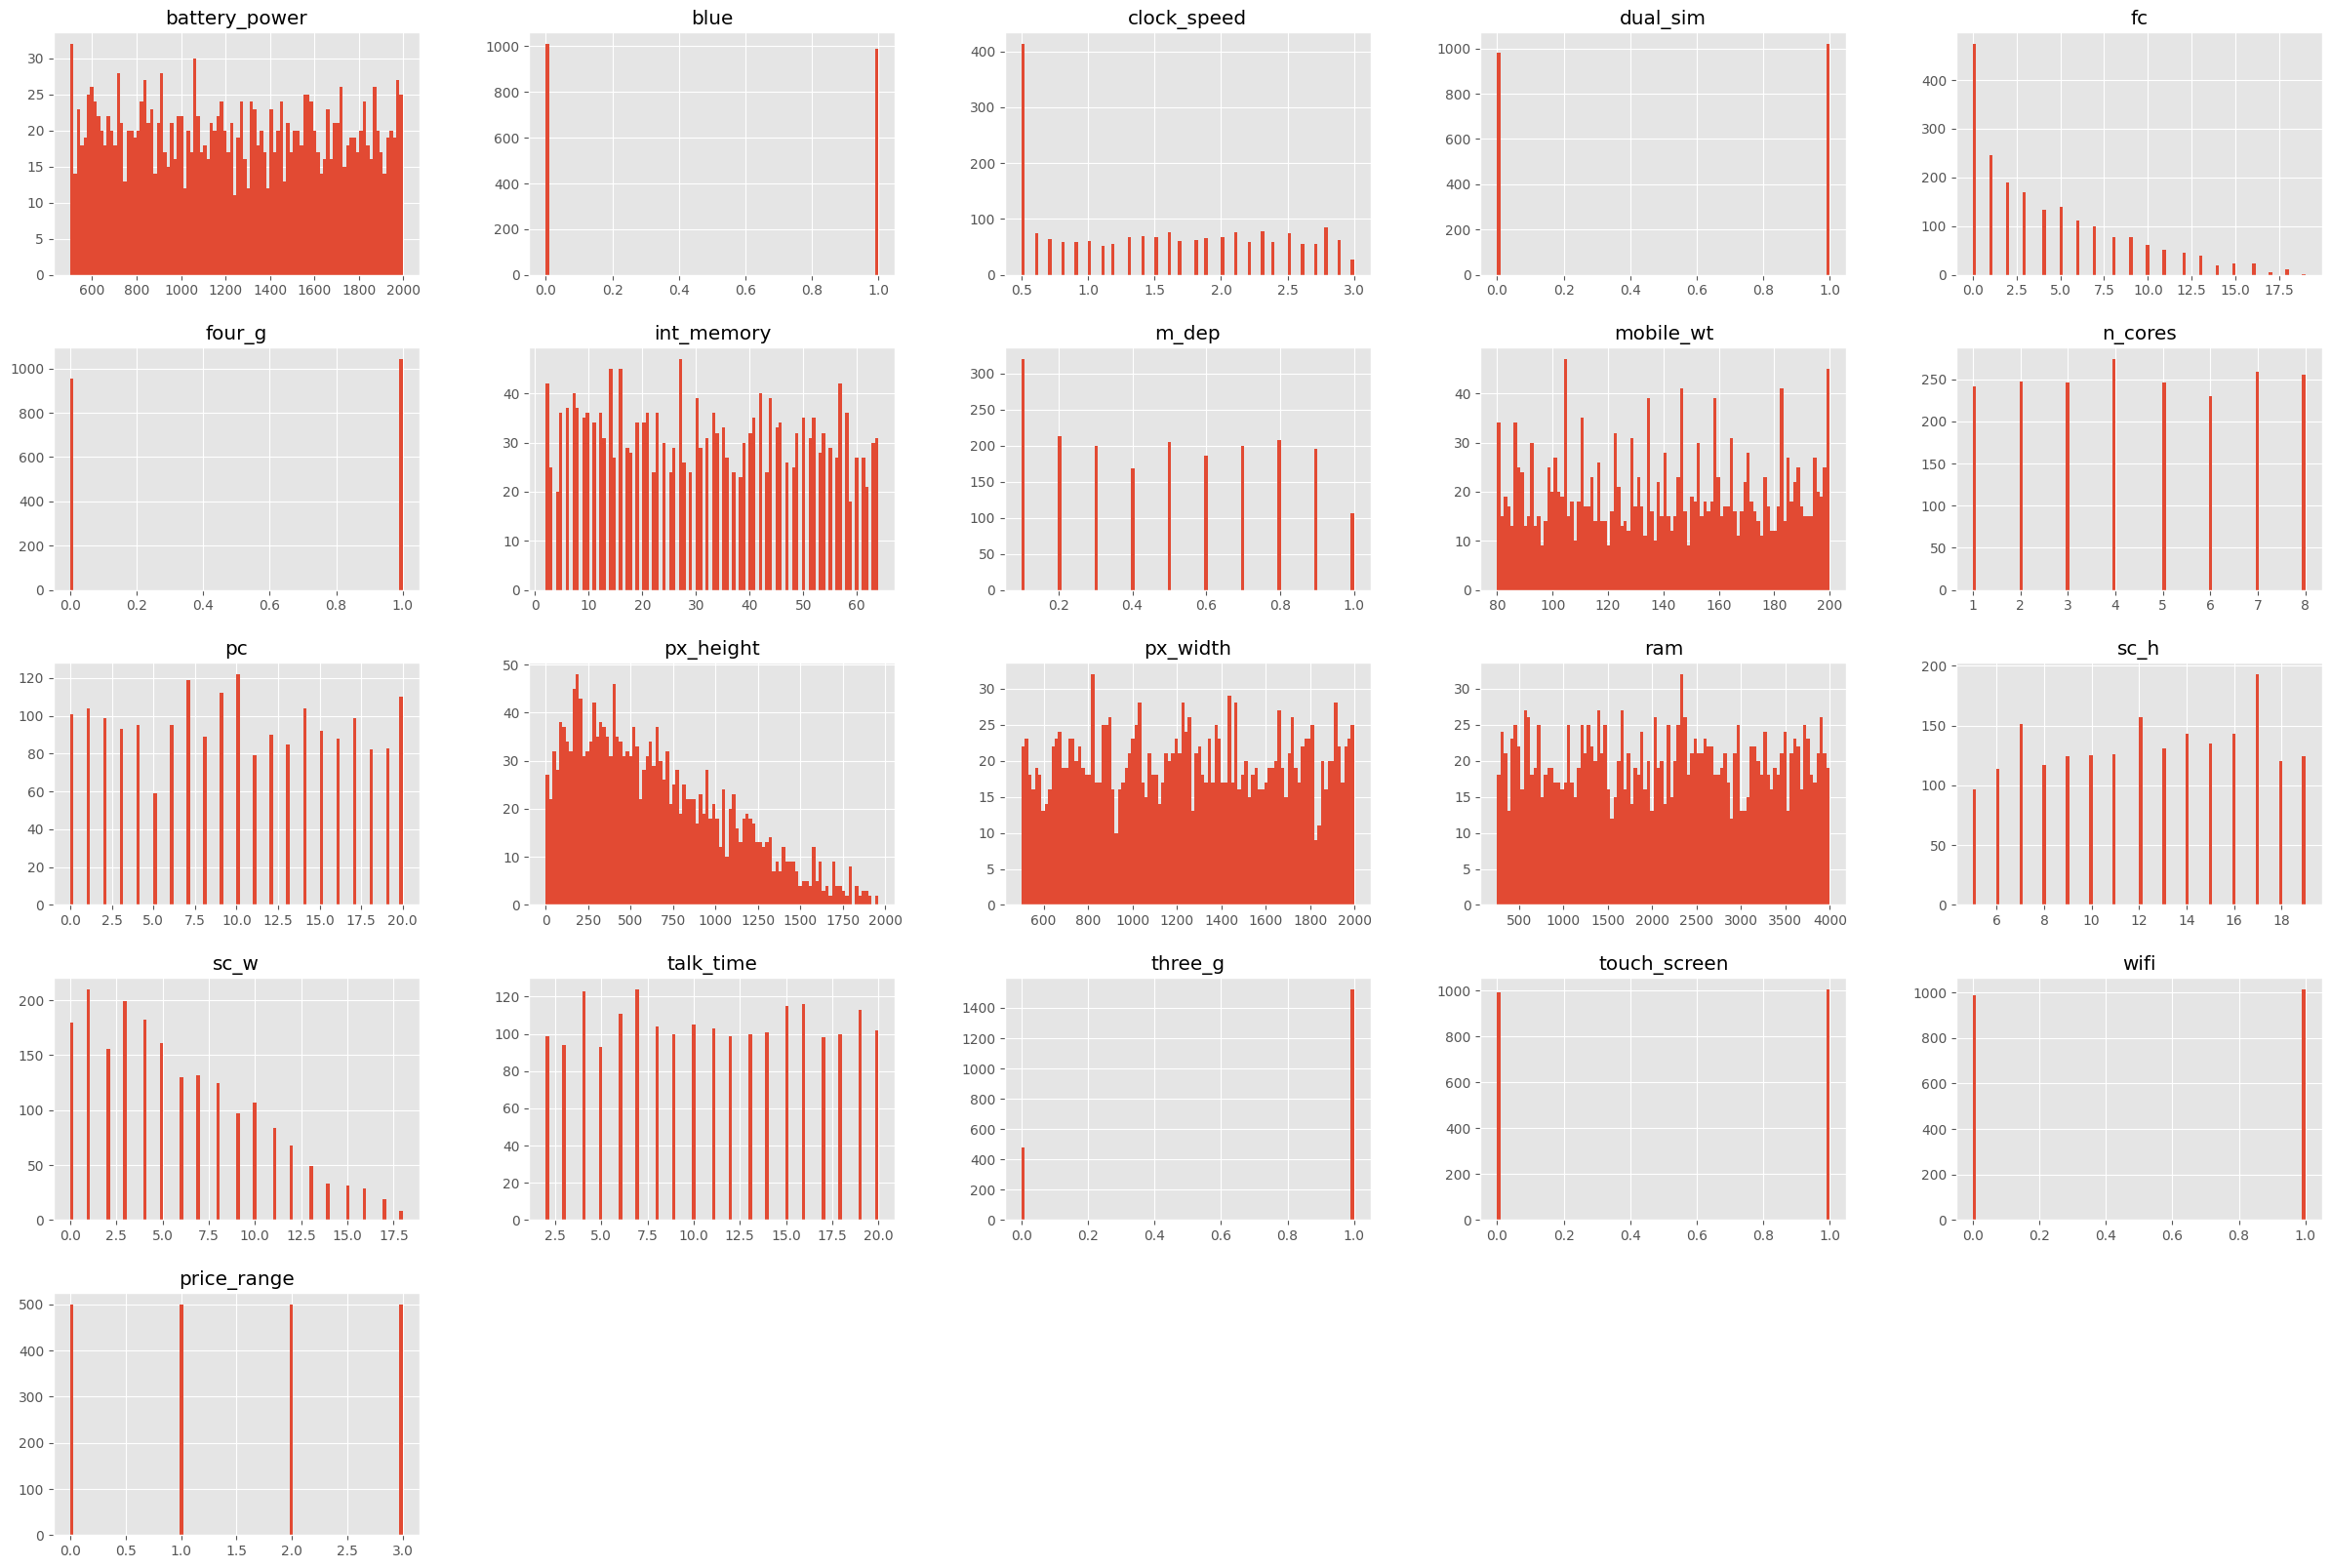

In [14]:
df_train.hist(bins=100,figsize=(30,20))
plt.show()

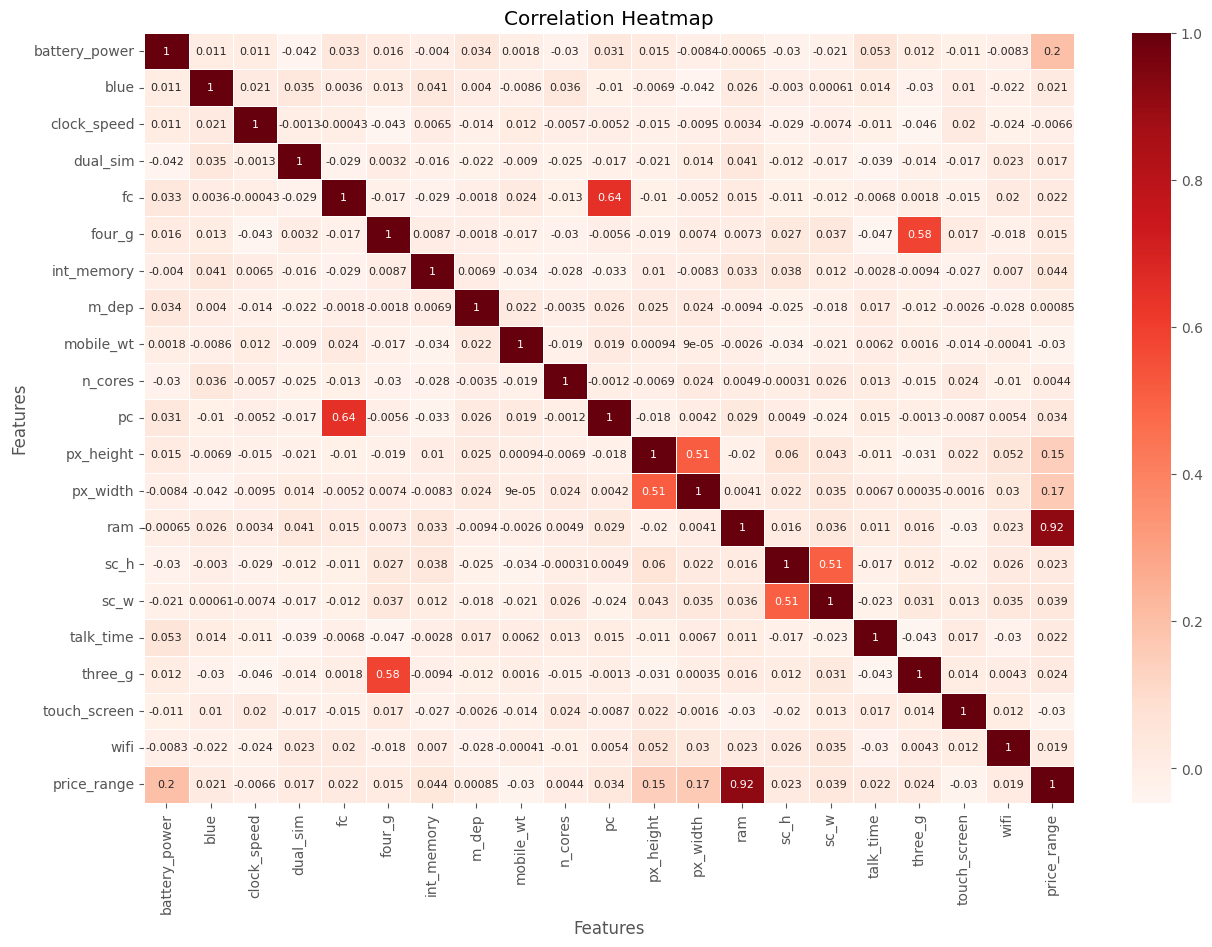

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_train.corr(numeric_only=[True]), cmap='Reds', cbar=True, annot=True, linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.xticks()
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Text(0, 0.5, 'Price range')

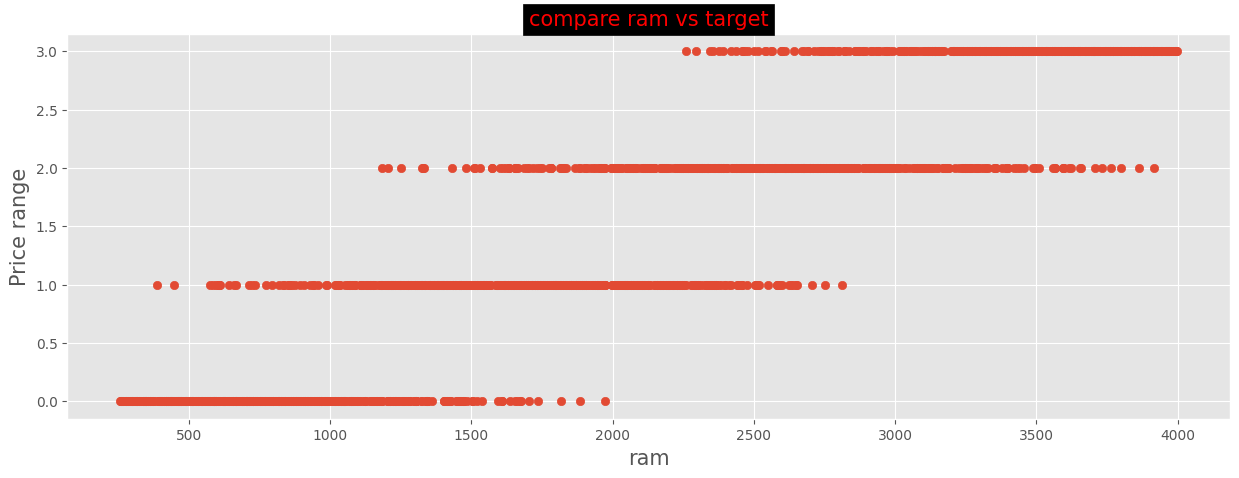

In [16]:
plt.figure(figsize=(15,5)) 
plt.scatter(x=df_train['ram'], y=df_train['price_range'])
plt.title('compare ram vs target',
            backgroundcolor='black',color='red',fontsize=15)
plt.xlabel('ram', fontsize = 15)
plt.ylabel('Price range', fontsize=15)

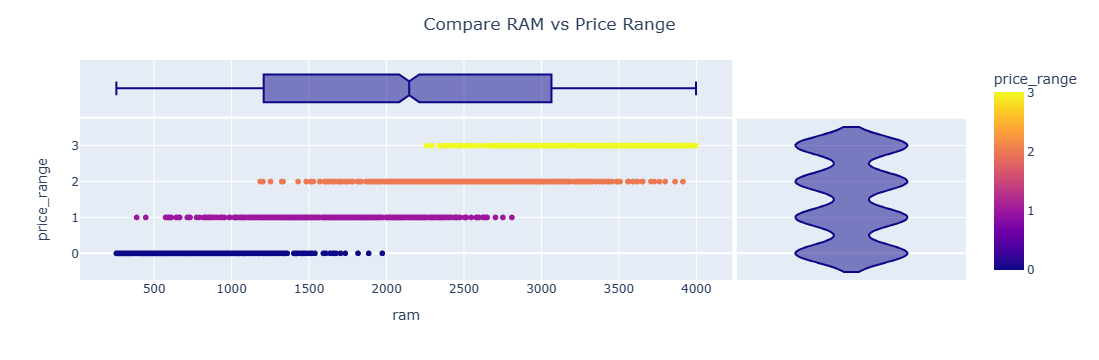

In [17]:
fig = px.scatter(df_train, x='ram', y='price_range',
                  color='price_range', marginal_y='violin', marginal_x='box')

fig.update_layout(
    title='Compare RAM vs Price Range',
    title_x=0.5
)

fig.show()

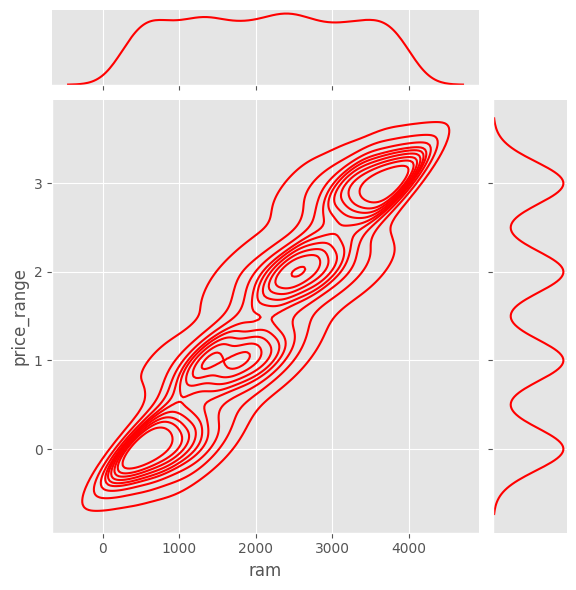

In [18]:
sns.jointplot(x='ram', y='price_range', data=df_train, color='red', kind='kde')

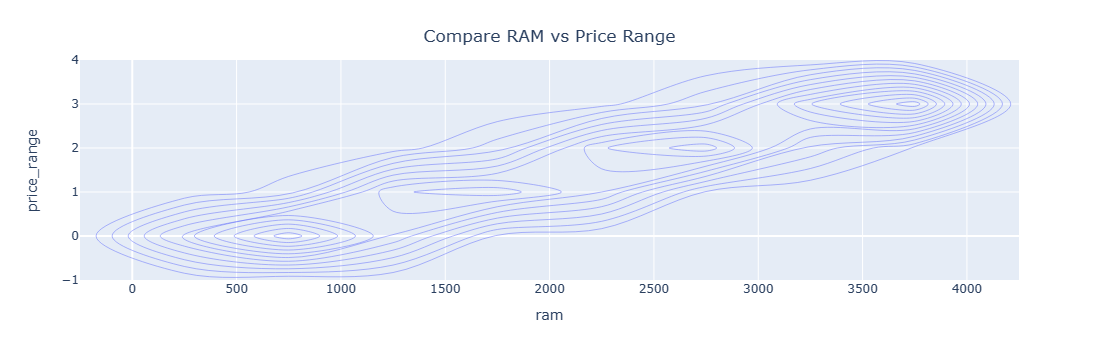

In [19]:
fig = px.density_contour(df_train, x='ram', y='price_range')

fig.update_layout(
    title='Compare RAM vs Price Range',
    title_x=0.5,
    title_yanchor='top'
)

fig.show()

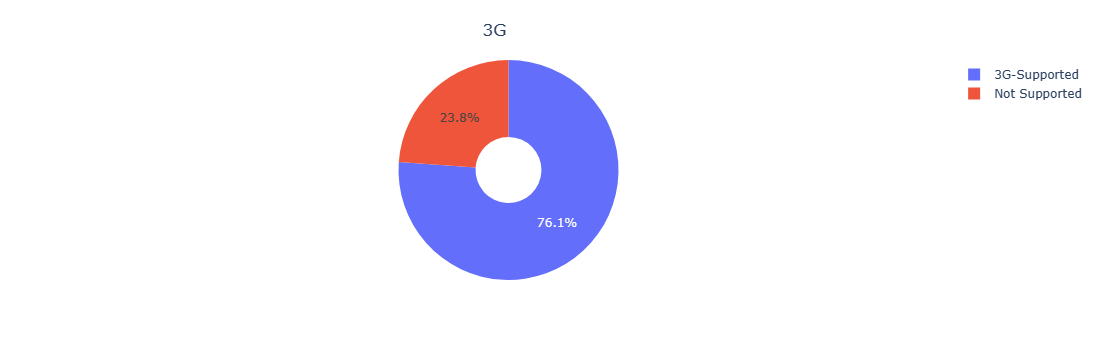

In [20]:

labels = ['3G-Supported', 'Not Supported']
values = df_train['three_g'].value_counts().values

fig = px.pie(values=values, 
              names=labels,
              hole=.3
            )
fig.update_layout(
    title_text="3G",
    title_x=0.45, 
    title_yanchor="middle"
)

fig.show()

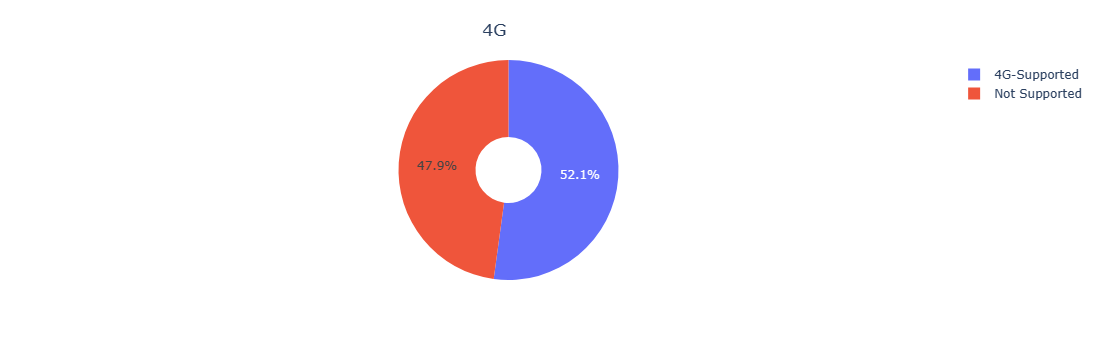

In [21]:
labels = ['4G-Supported', 'Not Supported']
values = df_train['four_g'].value_counts().values

fig = px.pie(values=values,  
             names=labels,
             hole=.3
            )

fig.update_layout(
    title_text="4G",
    title_x=0.45, 
    title_yanchor="middle"
)

fig.show()

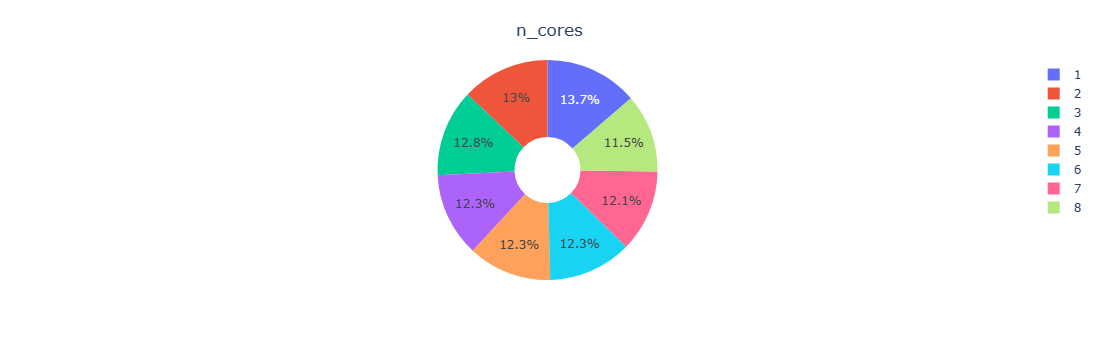

In [22]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8']
values = df_train['n_cores'].value_counts().values

fig = px.pie(values=values,  
             names=labels,
             hole=0.3
            )

fig.update_layout(
    title_text="n_cores",
    title_x=0.5, 
    title_yanchor="middle"
)

fig.show()

In [23]:
df_train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

<div class="alert alert-block alert-info"> Checking columns for abnormal values </div> 

### px_height

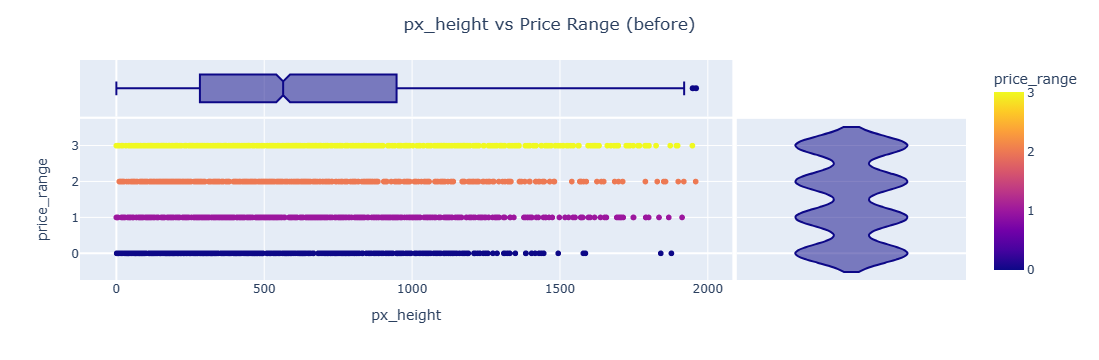

In [24]:
fig = px.scatter(df_train, x='px_height', y='price_range', color='price_range', marginal_y='violin', marginal_x='box')

fig.update_layout(
    title='px_height vs Price Range (before)',
    title_x=0.5
)

fig.show()

In [25]:
df_train.px_height.describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

In [26]:
print(df_train.px_height.min())

0


In [27]:
# Remove px_hight = 0
df_train = df_train[df_train['px_height']!=0]
df_train.reset_index(inplace=True)
df_train.drop('index', axis=1, inplace=True)

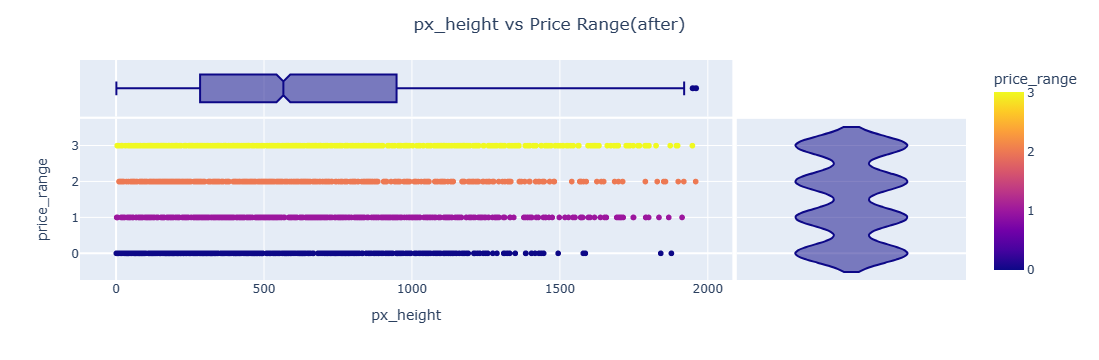

In [28]:
fig = px.scatter(df_train, x='px_height', y='price_range', color='price_range', marginal_y='violin', marginal_x='box')

fig.update_layout(
    title='px_height vs Price Range(after)',
    title_x=0.5
)

fig.show()

### sc_w

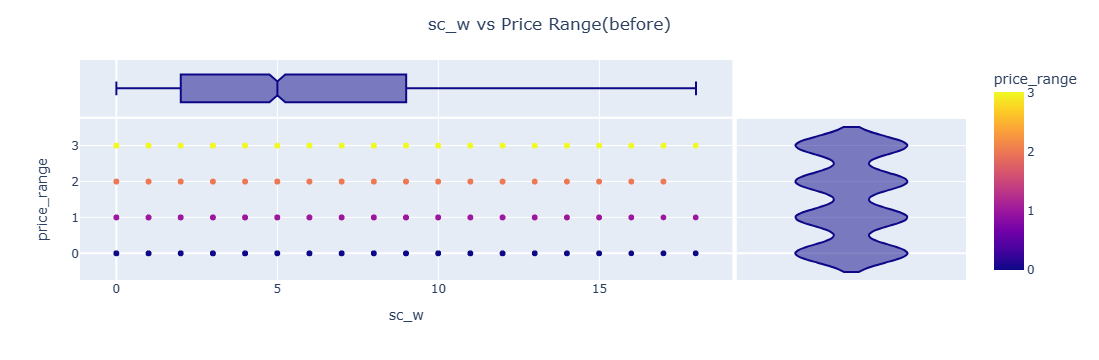

In [29]:
fig = px.scatter(df_train, x='sc_w', y='price_range', color='price_range', marginal_y='violin', marginal_x='box')

fig.update_layout(
    title='sc_w vs Price Range(before)',
    title_x=0.5
)

fig.show()

In [30]:
df_train.sc_w.describe()

count    1998.000000
mean        5.770270
std         4.356633
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

In [31]:
print(df_train.px_height.min())

1


In [32]:
# Remove sc_w =< 2
df_train = df_train[df_train['sc_w'] >= 2]
df_train.reset_index(inplace=True)
df_train.drop('index', axis=1, inplace=True)

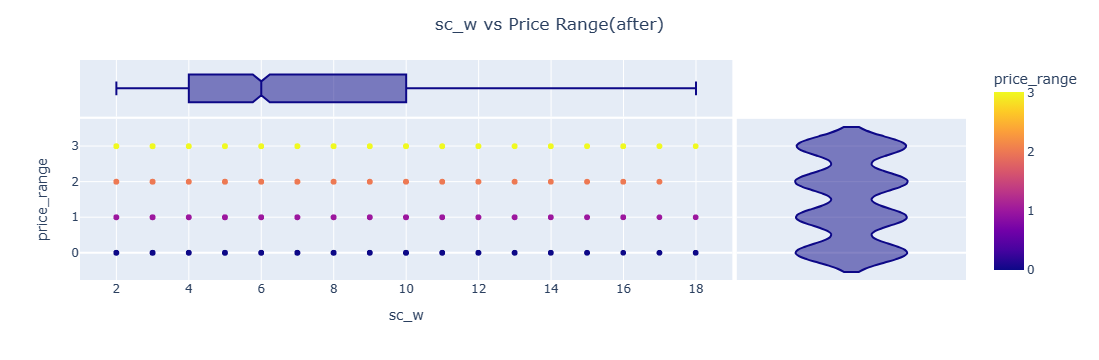

In [33]:
fig = px.scatter(df_train, x='sc_w', y='price_range', color='price_range', marginal_y='violin', marginal_x='box')

fig.update_layout(
    title='sc_w vs Price Range(after)',
    title_x=0.5
)

fig.show()

In [34]:
df_train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1604            858     0          2.2         0   1       0          50   
1605            794     1          0.5         1   0       1           2   
1606           1965     1          2.6         1   0       0          39   
1607           1512     0          0.9         0   4       1          46   
1608            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
1       0.7        136        3   6        905      1988  2631    17     3   
2       0.9        145        5   6       1263      1716  2603    11     2   
3       0.8        131        6   9       1216      1786  2769    16     8   
4       0.6        141        2  14       1208      1212  1411     8     2   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1604    0.1         84        1   2        528      1416  3978    17    16   
1605    0.8        106        6  14       1222      1890   668    13     4   
1606    0.2        187        4   3        915      1965  2032    11    10   
1607    0.1        145        5   5        336       670   869    18    10   
1608    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1604          3        1             1     0            3  
1605         19        1             1     0            0  
1606         16        1             1     1            2  
1607         19        1             1     1            0  
1608          2        1             1     1            3  

[1609 rows x 21 columns]

<div class="alert alert-block alert-info"> Apply this cahnges to the test dataframe </div>  

### px_height

In [35]:
df_test.px_height.describe()

count    1000.000000
mean      627.121000
std       432.929699
min         0.000000
25%       263.750000
50%       564.500000
75%       903.000000
max      1907.000000
Name: px_height, dtype: float64

In [36]:
print(df_test.px_height.min())

0


In [37]:
# Remove px_hight = 0
df_test = df_test[df_test['px_height']!=0]
df_test.reset_index(inplace=True)
df_test.drop('index', axis=1, inplace=True)

### sc_w

In [38]:
df_test.sc_w.describe()

count    998.000000
mean       5.315631
std        4.244245
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       18.000000
Name: sc_w, dtype: float64

In [39]:
print(df_test.sc_w.min())

0


In [40]:
# Remove sc_w =< 2
df_test = df_test[df_test['sc_w'] >= 2]
df_test.reset_index(inplace=True)
df_test.drop('index', axis=1, inplace=True)

In [41]:
df_test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       3           1807     1          2.8         0   1       0          27   
2       5           1434     0          1.4         0  11       1          49   
3       6           1464     1          2.9         1   5       1          50   
4       7           1718     0          2.4         0   1       0          47   
..    ...            ...   ...          ...       ...  ..     ...         ...   
782   994            567     1          2.7         1  14       1          56   
783   995            936     1          1.4         1   0       0          46   
784   996           1700     1          1.9         0   0       1          54   
785   999           1533     1          0.5         1   0       0          50   
786  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  16        226      1412  3476    12     7   
1      0.9        186        3   4       1270      1366  2396    17    10   
2      0.5        108        6  18        749       810  1773    15     8   
3      0.8        198        8   9        569       939  3506    10     7   
4      1.0        156        2   3       1283      1374  3873    14     2   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
782    0.4        165        8  17        555      1290   336     7     6   
783    0.8        139        2   0        265       886   684     8     5   
784    0.5        170        7  17        644       913  2121    14     8   
785    0.4        171        2  12         38       832  2509    15    11   
786    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1           10        0             1     1  
2            7        1             0     1  
3            3        1             1     1  
4           10        0             0     0  
..         ...      ...           ...   ...  
782          7        1             1     1  
783         12        1             1     1  
784         15        1             1     0  
785          6        0             1     0  
786          3        1             0     1  

[787 rows x 21 columns]

# Model

## DecisionTrees

In [42]:
Xd = df_train.drop('price_range', axis=1)
yd = df_train.price_range.values.reshape(-1, 1)

In [43]:
def DT(Xd, yd, test_sizes, max_depths, criterion, splitter):
    df_evaluation = pd.DataFrame(columns=['Test_size', 'Max_depth', 'Criterion', 'Splitter', 'Accuracy', 'Score'])
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(Xd, yd, test_size=test_size, random_state=0)
        for max_depth in max_depths:
            for c in criterion:
                for s in splitter:
                    clf = DecisionTreeClassifier(max_depth=max_depth, criterion=c, splitter=s)
                    clf.fit(X_train, y_train)
                    y_pred = clf.predict(X_test)
                    accuracy = metrics.accuracy_score(y_test, y_pred)
                    score = clf.score(Xd, yd)
                    df_evaluation = pd.concat([df_evaluation, pd.DataFrame({'Test_size': test_size,
                                                                            'Max_depth': max_depth,
                                                                            'Criterion': c,
                                                                            'Splitter': s,
                                                                            'Accuracy': accuracy,
                                                                            'Score': score}, index=[0])], ignore_index=True)


    return (df_evaluation)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
max_depths = list(range(1, 21))
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']

df_evaluation = DT(Xd, yd, test_sizes, max_depths, criterion=criterion, splitter=splitter)
df_evaluation.style.apply(highlight_max)


<div class="alert alert-block alert-info">  Row:60, testsize=0.1, Max_depth=11, Criterion=gini, Splitter=best, Accuracy=0.881988, Score=0.986948 </div> 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(Xd, yd, test_size=0.1, random_state=0)

In [45]:
clf_dts = DecisionTreeClassifier(max_depth=11, criterion='gini', splitter='best')
clf_dts.fit(X_train, y_train)
y_pred = clf_dts.predict(X_test)

In [46]:
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred), '\nScore = ', clf_dts.score(Xd, yd))

Accuracy =  0.8757763975155279 
Score =  0.9863269111249223


## RandomForest

In [47]:
Xr = df_train.drop('price_range', axis=1)
yr = df_train.price_range.values.reshape(-1, 1)

In [48]:
def RF(Xr, yr, Testsize, mdepth):
    df_evaluation = pd.DataFrame()
    for x in Testsize:
        X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=x, random_state=0)
        for maxdepth in mdepth:
            for n_estimators in [10, 50, 100, 200, 300]:
                for criterion in ["gini", "entropy", "log_loss"]:
                        RF = RandomForestClassifier(n_estimators=n_estimators,
                                                     criterion=criterion,
                                                     max_depth=maxdepth)
                        RF.fit(X_train, y_train)
                        y_pred = RF.predict(X_test)
                        dict = {'Test_size': x,
                                "Max_depth": maxdepth,
                                "n_estimators": n_estimators,
                                "criterion": criterion,
                                'acc': metrics.accuracy_score(y_test,y_pred),
                                "score": RF.score(Xr, yr)}
                        df_evaluation = pd.concat([df_evaluation, pd.DataFrame(dict, index=[0])], ignore_index=True)
    return(df_evaluation)


df_evaluation = RF(Xr, yr, [.1,.15,.2,.25,.3], range(1,21))
df_evaluation.style.apply(highlight_max)


<div class="alert alert-block alert-info"> Row=264, Test_size=0.1, Max_depth=18, n_estimators=200, criterion=gini, Accuracy=0.925466, Score=0.992542 </div>  

In [49]:
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.1, random_state=0)

In [50]:
clf_rf = RandomForestClassifier(max_depth=19, n_estimators=200, criterion='gini')
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [51]:
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred), '\nScore = ', clf_rf.score(Xr, yr))

Accuracy =  0.906832298136646 
Score =  0.9906774394033562


## SVM

In [52]:
Xs = df_train.drop('price_range', axis=1)
ys = df_train.price_range.values.reshape(-1, 1)

In [53]:
def svc(Xs, ys, Testsize):
    df_evaluation_svm = pd.DataFrame()

    C_values = [0.1, 1, 10]
    kernel_values = ['linear', 'rbf', 'poly', 'sigmoid']
    decision_function_shape_values = ['ovo', 'ovr']
    degree_values = [2, 3, 4]
    gamma_values = ['scale', 'auto']

    for C in C_values:
        for kernel in kernel_values:
            for decision_function_shape in decision_function_shape_values:
                for degree in degree_values:
                    for gamma in gamma_values:
                        for x in Testsize:
                            X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=x, random_state=0)
                            svm = SVC(C=C, kernel=kernel, decision_function_shape=decision_function_shape, degree=degree, gamma=gamma)
                            svm.fit(X_train, y_train)
                            y_pred = svm.predict(X_test)
                            dict = {'C': C, 'kernel': kernel, 'decision_function_shape': decision_function_shape, 'degree': degree, 'gamma': gamma, 'Test_size': x, 'acc': metrics.accuracy_score(y_test, y_pred), 'score': svm.score(Xs, ys)}
                            df_evaluation_svm = pd.concat([df_evaluation_svm, pd.DataFrame(dict, index=[0])], ignore_index=True)

    return (df_evaluation_svm)


df_evaluation_svm = svc(Xs, ys, [.1, .15, .2, .25, .3])
df_evaluation_svm.style.apply(highlight_max)


<div class="alert alert-block alert-info"> Row=1, C=0.1, kernel=linear, decision_function_shape=ovo, degree=2, gamma=scale, Test_size=0.15, acc=0.983471, score=0.988813 </div>  

In [54]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.15, random_state=0)

In [55]:
clf_svm = SVC(C=0.1, kernel='linear', decision_function_shape='ovo',degree=2, gamma='scale')
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)

In [56]:
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred), '\nScore = ', clf_svm.score(Xs, ys))

Accuracy =  0.9834710743801653 
Score =  0.9888129272840274


#### Best model =>SVM

# Predict Test data

In [57]:
df_test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       3           1807     1          2.8         0   1       0          27   
2       5           1434     0          1.4         0  11       1          49   
3       6           1464     1          2.9         1   5       1          50   
4       7           1718     0          2.4         0   1       0          47   
..    ...            ...   ...          ...       ...  ..     ...         ...   
782   994            567     1          2.7         1  14       1          56   
783   995            936     1          1.4         1   0       0          46   
784   996           1700     1          1.9         0   0       1          54   
785   999           1533     1          0.5         1   0       0          50   
786  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  16        226      1412  3476    12     7   
1      0.9        186        3   4       1270      1366  2396    17    10   
2      0.5        108        6  18        749       810  1773    15     8   
3      0.8        198        8   9        569       939  3506    10     7   
4      1.0        156        2   3       1283      1374  3873    14     2   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
782    0.4        165        8  17        555      1290   336     7     6   
783    0.8        139        2   0        265       886   684     8     5   
784    0.5        170        7  17        644       913  2121    14     8   
785    0.4        171        2  12         38       832  2509    15    11   
786    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1           10        0             1     1  
2            7        1             0     1  
3            3        1             1     1  
4           10        0             0     0  
..         ...      ...           ...   ...  
782          7        1             1     1  
783         12        1             1     1  
784         15        1             1     0  
785          6        0             1     0  
786          3        1             0     1  

[787 rows x 21 columns]

In [58]:
df_test = df_test.drop('id', axis=1)

In [59]:
predict = clf_svm.predict(df_test)

In [60]:
predict

array([3, 2, 1, 3, 3, 1, 3, 3, 3, 0, 2, 0, 2, 1, 3, 3, 1, 3, 0, 2, 0, 3,
       0, 2, 0, 3, 0, 0, 1, 3, 1, 1, 1, 2, 0, 0, 1, 3, 1, 1, 0, 0, 3, 1,
       3, 1, 3, 3, 1, 2, 1, 2, 1, 2, 2, 3, 0, 0, 2, 0, 3, 3, 0, 3, 0, 3,
       1, 3, 1, 2, 2, 1, 2, 2, 0, 0, 3, 0, 2, 0, 1, 2, 3, 3, 2, 3, 3, 3,
       2, 3, 0, 0, 3, 2, 1, 2, 0, 2, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1, 3, 0, 2, 0, 1, 0,
       0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 3, 3, 2, 3, 2,
       3, 2, 1, 1, 0, 1, 2, 0, 2, 3, 0, 2, 0, 3, 2, 3, 0, 1, 0, 3, 0, 0,
       2, 2, 1, 3, 3, 0, 3, 1, 2, 0, 0, 1, 3, 3, 3, 0, 0, 2, 3, 1, 3, 1,
       3, 1, 2, 3, 3, 1, 0, 1, 3, 1, 1, 3, 2, 1, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 3, 3, 2, 1, 1, 0, 2, 0, 0, 3, 0, 3, 0, 1, 2, 0, 2, 3, 1, 2,
       2, 1, 0, 0, 1, 3, 2, 0, 0, 0, 3, 0, 2, 3, 1, 2, 2, 2, 1, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 1, 2, 3, 0, 1, 0, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 2, 1, 2, 3,

In [61]:
df_test['price_range'] = predict

In [62]:
df_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1             1807     1          2.8         0   1       0          27   
2             1434     0          1.4         0  11       1          49   
3             1464     1          2.9         1   5       1          50   
4             1718     0          2.4         0   1       0          47   
..             ...   ...          ...       ...  ..     ...         ...   
782            567     1          2.7         1  14       1          56   
783            936     1          1.4         1   0       0          46   
784           1700     1          1.9         0   0       1          54   
785           1533     1          0.5         1   0       0          50   
786           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  16        226      1412  3476    12     7   
1      0.9        186        3   4       1270      1366  2396    17    10   
2      0.5        108        6  18        749       810  1773    15     8   
3      0.8        198        8   9        569       939  3506    10     7   
4      1.0        156        2   3       1283      1374  3873    14     2   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
782    0.4        165        8  17        555      1290   336     7     6   
783    0.8        139        2   0        265       886   684     8     5   
784    0.5        170        7  17        644       913  2121    14     8   
785    0.4        171        2  12         38       832  2509    15    11   
786    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  price_range  
0            2        0             1     0            3  
1           10        0             1     1            2  
2            7        1             0     1            1  
3            3        1             1     1            3  
4           10        0             0     0            3  
..         ...      ...           ...   ...          ...  
782          7        1             1     1            0  
783         12        1             1     1            0  
784         15        1             1     0            2  
785          6        0             1     0            2  
786          3        1             0     1            2  

[787 rows x 21 columns]

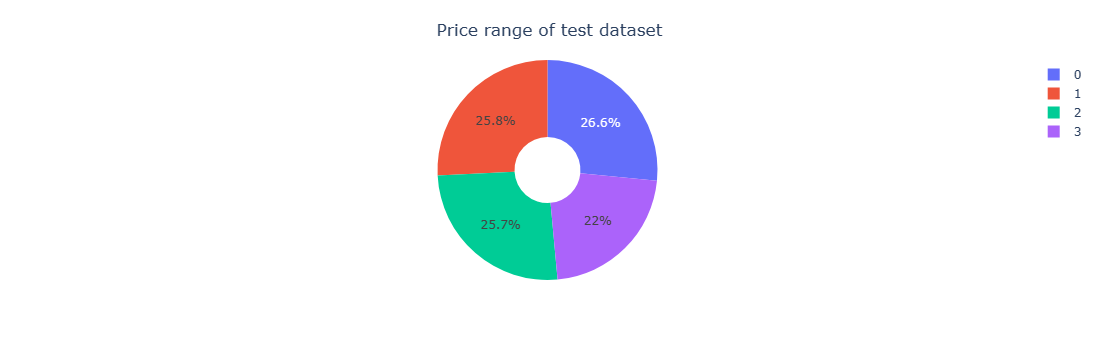

In [63]:
labels = ['0', '1', '2', '3']
values = df_test['price_range'].value_counts().values

fig = px.pie(values=values,  
             names=labels,
             hole=0.3)

fig.update_layout(
    title_text="Price range of test dataset",
    title_x=0.5, 
    title_yanchor="middle"
)

fig.show()

## If you want to run this code again, you will not get my answer. This difference is related to the algorithms used.